In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ML_Gmail.csv')
df = df = df.drop(columns=['time'])
df

,google.accounts:gmail_used_quota_in_mb,google.accounts:num_users
0,70401973,93082
1,70417224,93123
2,70444688,93171
3,70454107,93225
4,70484435,93284
...,...,...
326,82603256,102199
327,82611850,102207
328,82617049,102212
329,82621747,102216


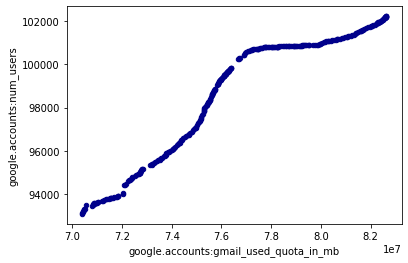

In [3]:
df.plot.scatter(x='google.accounts:gmail_used_quota_in_mb',y='google.accounts:num_users',c='DarkBlue')

In [4]:
new_df = df.drop('google.accounts:gmail_used_quota_in_mb',axis='columns')
new_df.fillna(new_df['google.accounts:num_users'].median())
new_df

,google.accounts:num_users
0,93082
1,93123
2,93171
3,93225
4,93284
...,...
326,102199
327,102207
328,102212
329,102216


In [6]:
mb = df.drop('google.accounts:num_users',axis='columns')
mb = mb.fillna(mb['google.accounts:gmail_used_quota_in_mb'].median())
mb = mb['google.accounts:gmail_used_quota_in_mb']
mb

0      70401973
1      70417224
2      70444688
3      70454107
4      70484435
         ...   
326    82603256
327    82611850
328    82617049
329    82621747
330    82630067
Name: google.accounts:gmail_used_quota_in_mb, Length: 331, dtype: int64

In [7]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
data = {'users': [100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]}
users = pd.DataFrame(data=data)
users

,users
0,100000
1,150000
2,200000
3,250000
4,300000
5,350000
6,400000
7,450000
8,500000


In [9]:
p = reg.predict(users)
p

array([7.82245255e+07, 1.36879542e+08, 1.95534558e+08, 2.54189574e+08,
       3.12844590e+08, 3.71499607e+08, 4.30154623e+08, 4.88809639e+08,
       5.47464655e+08])

In [10]:
users['data_mb']=p
users

,users,data_mb
0,100000,7.822453e+07
1,150000,1.368795e+08
2,200000,1.955346e+08
3,250000,2.541896e+08
4,300000,3.128446e+08
5,350000,3.714996e+08
6,400000,4.301546e+08
7,450000,4.888096e+08
8,500000,5.474647e+08


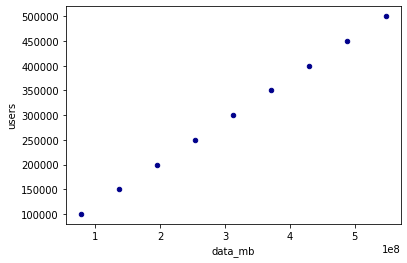

In [11]:
users.plot.scatter(y='users',x='data_mb',c='DarkBlue')